20132915 Nam, Geunwoo

[Visualize average images]

1. Load MNIST training dataset.
2. Compute the average images for each label (digit) based on L2-norm.
3. Visualize the average images.

L2-norm formula

$$ \lvert\rvert{x}\lvert\rvert = \sqrt{x_1^2+x_2^2+...+x_n^2} = \sqrt{x^Tx}$$

We will calculate the L2-norm of each MNIST dataset by their label(0-9).
First, we calculate the square of pixels in each image.

$$ L_2\_norm = \begin{pmatrix} x_1 & x_2 & ... & x_{784} \end{pmatrix} $$

Second, we add the squared values by their label.

$$ L_2\_norm[i] = \sum_{j=0}^{count} x_i\, , where\, i\, denote\, the\, label. $$

Then, we divide them by their count.

$$ L_2\_norm[i] = L_2\_norm[i] / count[i] $$

Finally, we will visualize the values using matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image
# 28 * 28 = 784

num_image	= len(data)
count       	= 0     # count for the number of images

In [3]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

In [4]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    # list_label[] : label
    list_label[count]       = label
    # list_image
    list_image[:, count]    = im_vector    

    count += 1

In [5]:
# Calculate L2 norm
# L2_norm ndarray for 0 - 9 labels.
# Use list_label(1*60000) and list_image(784*60000)
L2_norm = np.zeros((size_row * size_col, 10), dtype=float)

list_image_squared=list_image ** 2

In [6]:
# Calculate L2 norm
# L2_norm ndarray for 0 - 9 labels.
# Use list_label(1*60000) and list_image(784*60000)
L2_norm = np.zeros((size_row * size_col, 10), dtype=float)
L2_norm_count = np.zeros(10)
list_image_squared=list_image ** 2

In [7]:
i = 0
while i < num_image:
    if list_label[i] == 0:
        L2_norm[:,0] += list_image_squared[:,i]
        L2_norm_count[0] += 1
    elif list_label[i] == 1:
        L2_norm[:,1] += list_image_squared[:,i]
        L2_norm_count[1] += 1
    elif list_label[i] == 2:
        L2_norm[:,2] += list_image_squared[:,i]
        L2_norm_count[2] += 1
    elif list_label[i] == 3:
        L2_norm[:,3] += list_image_squared[:,i]
        L2_norm_count[3] += 1
    elif list_label[i] == 4:
        L2_norm[:,4] += list_image_squared[:,i]
        L2_norm_count[4] += 1
    elif list_label[i] == 5:
        L2_norm[:,5] += list_image_squared[:,i]
        L2_norm_count[5] += 1
    elif list_label[i] == 6:
        L2_norm[:,6] += list_image_squared[:,i]
        L2_norm_count[6] += 1
    elif list_label[i] == 7:
        L2_norm[:,7] += list_image_squared[:,i]
        L2_norm_count[7] += 1
    elif list_label[i] == 8:
        L2_norm[:,8] += list_image_squared[:,i]
        L2_norm_count[8] += 1
    elif list_label[i] == 9:
        L2_norm[:,9] += list_image_squared[:,i]
        L2_norm_count[9] += 1
    i += 1
L2_norm = np.sqrt(L2_norm)
L2_norm /= L2_norm_count

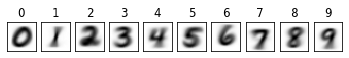

In [8]:
# 
# plot L2 norm images by their labels
# 
f1 = plt.figure(1)

for i in range(10):

    label       = i
    im_vector   = L2_norm[:, i]
    im_matrix   = L2_norm[:, i].reshape((size_row, size_col))
    
    plt.subplot(1, 10, i+1)
    plt.title(label)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()